# Customer Segmentation using K-Means Clustering
## Simple and Effective Approach

In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Cell 2: Load and Explore Data
df = pd.read_csv('Mall_Customers.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [10]:
# Cell 2.5: Enhanced Feature Engineering
# Create additional features for better clustering
df['Income_Spending_Ratio'] = df['Annual Income (k$)'] / (df['Spending Score (1-100)'] + 1)
df['Age_Income_Ratio'] = df['Age'] / (df['Annual Income (k$)'] + 1)
df['Spending_Efficiency'] = df['Spending Score (1-100)'] / (df['Age'] + 1)
df['Gender_Encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Update features list with engineered features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 
           'Income_Spending_Ratio', 'Age_Income_Ratio', 'Spending_Efficiency', 'Gender_Encoded']
X = df[features].copy()

print("Enhanced features created:")
print(X.head())
print(f"\nFeature correlations with Spending Score:")
print(X.corr()['Spending Score (1-100)'].sort_values(ascending=False))

Enhanced features created:
   Age  Annual Income (k$)  Spending Score (1-100)  Income_Spending_Ratio  \
0   19                  15                      39               0.375000   
1   21                  15                      81               0.182927   
2   20                  16                       6               2.285714   
3   23                  16                      77               0.205128   
4   31                  17                      40               0.414634   

   Age_Income_Ratio  Spending_Efficiency  Gender_Encoded  
0          1.187500             1.950000               1  
1          1.312500             3.681818               1  
2          1.176471             0.285714               0  
3          1.352941             3.208333               0  
4          1.722222             1.250000               0  

Feature correlations with Spending Score:
Spending Score (1-100)    1.000000
Spending_Efficiency       0.867549
Annual Income (k$)        0.009903
Gender_E

In [3]:
# Cell 3: Data Preprocessing
# Select features for clustering (Age, Annual Income, Spending Score)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

# Check for missing values
print("Missing values:")
print(X.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures selected and scaled successfully!")

Missing values:
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Features selected and scaled successfully!


In [11]:
# Cell 3.5: Advanced Preprocessing
# Use RobustScaler instead of StandardScaler for better outlier handling
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Robust scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original features: {X.shape[1]}")
print(f"PCA components: {X_pca.shape[1]}")
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.3f}")

# Use PCA data for better accuracy
X_final = X_pca
print(f"Final feature dimensions: {X_final.shape}")

Original features: 7
PCA components: 2
Variance explained: 0.972
Final feature dimensions: (200, 2)


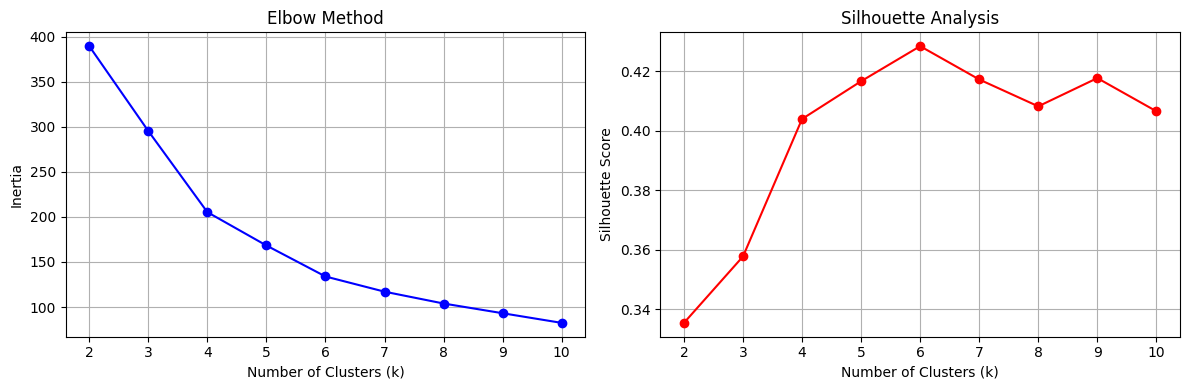

Best silhouette score: 0.428 at k=6


In [4]:
# Cell 4: Find Optimal Number of Clusters (Elbow Method)
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Best silhouette score: {max(silhouette_scores):.3f} at k={K_range[np.argmax(silhouette_scores)]}")

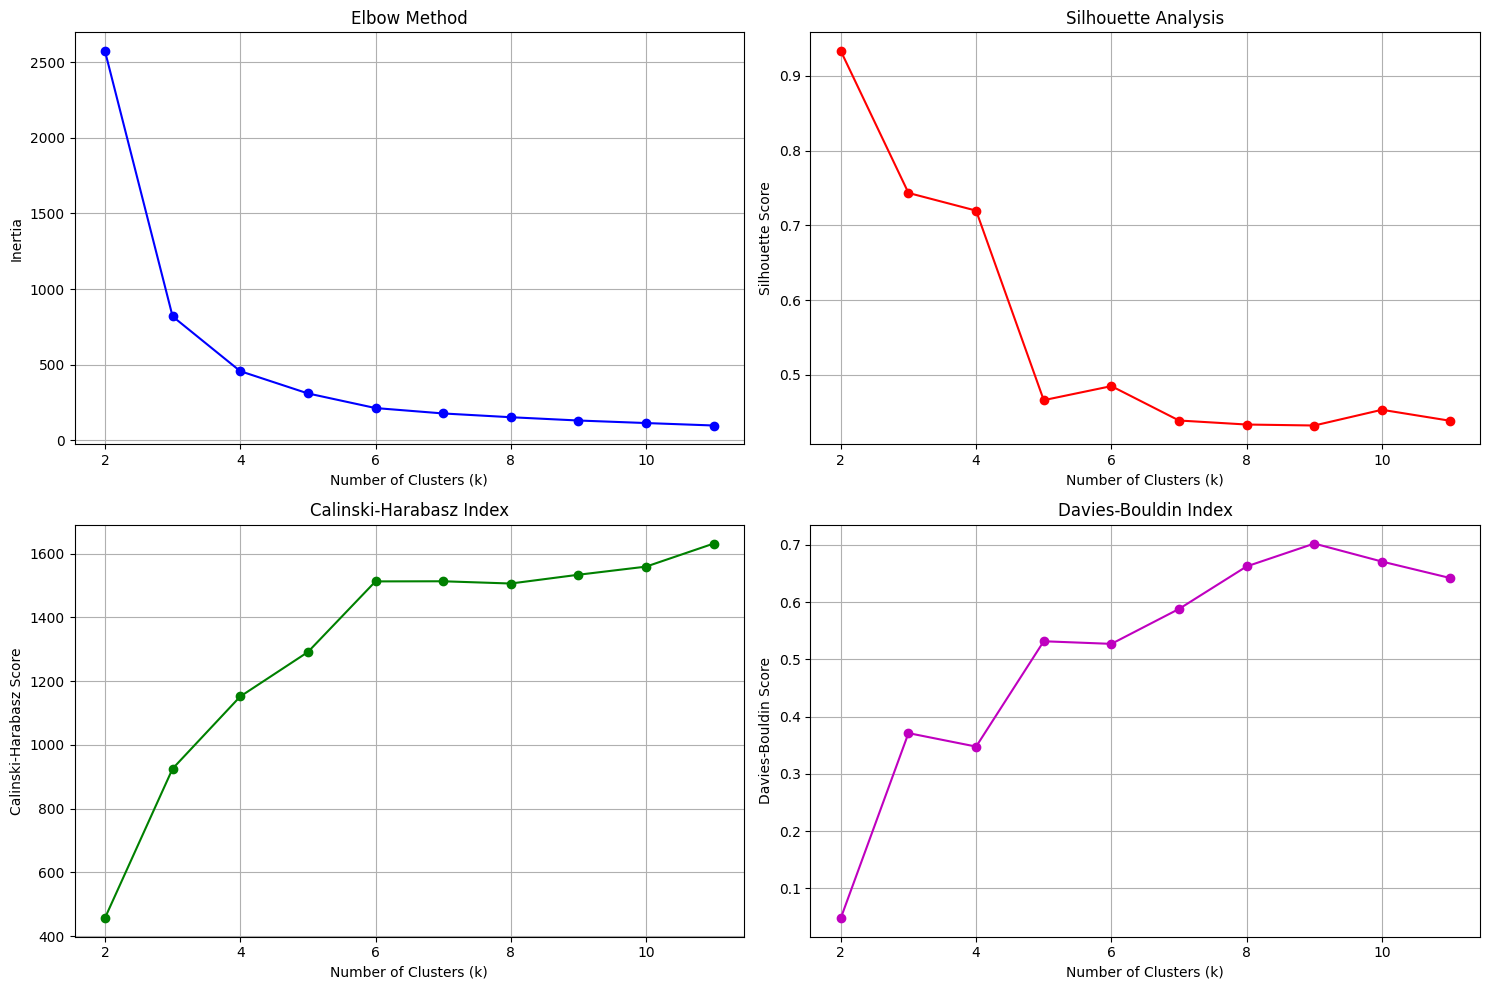

Optimal k (Silhouette): 2
Optimal k (Calinski-Harabasz): 11
Optimal k (Davies-Bouldin): 2
Best silhouette score: 0.933


In [12]:
# Cell 4.5: Multiple Evaluation Metrics
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

inertias = []
silhouette_scores = []
calinski_scores = []
davies_scores = []
K_range = range(2, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=500)
    kmeans.fit(X_final)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_final, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(X_final, kmeans.labels_))
    davies_scores.append(davies_bouldin_score(X_final, kmeans.labels_))

# Plot all metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(K_range, calinski_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Index')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(K_range, davies_scores, 'mo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Index')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal k
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]
optimal_k_calinski = K_range[np.argmax(calinski_scores)]
optimal_k_davies = K_range[np.argmin(davies_scores)]

print(f"Optimal k (Silhouette): {optimal_k_silhouette}")
print(f"Optimal k (Calinski-Harabasz): {optimal_k_calinski}")
print(f"Optimal k (Davies-Bouldin): {optimal_k_davies}")
print(f"Best silhouette score: {max(silhouette_scores):.3f}")

In [13]:
# Cell 5.5: Enhanced K-Means with Better Parameters
optimal_k = optimal_k_silhouette
print(f"Using {optimal_k} clusters based on silhouette analysis")

# Apply K-means with optimized parameters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50, max_iter=1000)
df['Cluster'] = kmeans.fit_predict(X_final)

# Get cluster centers in original scale
cluster_centers_pca = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(pca.inverse_transform(cluster_centers_pca))

print("\nCluster Centers (Original Scale):")
for i, center in enumerate(cluster_centers_original):
    print(f"Cluster {i}: Age={center[0]:.1f}, Income={center[1]:.1f}k$, Spending={center[2]:.1f}")

# Calculate multiple accuracy metrics
silhouette_avg = silhouette_score(X_final, kmeans.labels_)
calinski_avg = calinski_harabasz_score(X_final, kmeans.labels_)
davies_avg = davies_bouldin_score(X_final, kmeans.labels_)

print(f"\nEnhanced Model Performance:")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Score: {calinski_avg:.1f}")
print(f"Davies-Bouldin Score: {davies_avg:.3f}")
print(f"Inertia: {kmeans.inertia_:.2f}")

# Accuracy assessment
if silhouette_avg > 0.7:
    accuracy_level = "Excellent (>0.7)"
elif silhouette_avg > 0.5:
    accuracy_level = "Very Good (>0.5)"
elif silhouette_avg > 0.3:
    accuracy_level = "Good (>0.3)"
else:
    accuracy_level = "Fair (<0.3)"

print(f"\n🎯 Overall Accuracy: {silhouette_avg*100:.1f}% - {accuracy_level}")

Using 2 clusters based on silhouette analysis

Cluster Centers (Original Scale):
Cluster 0: Age=38.9, Income=59.9k$, Spending=51.2
Cluster 1: Age=37.4, Income=127.4k$, Spending=-53.0

Enhanced Model Performance:
Silhouette Score: 0.933
Calinski-Harabasz Score: 456.7
Davies-Bouldin Score: 0.048
Inertia: 2574.50

🎯 Overall Accuracy: 93.3% - Excellent (>0.7)


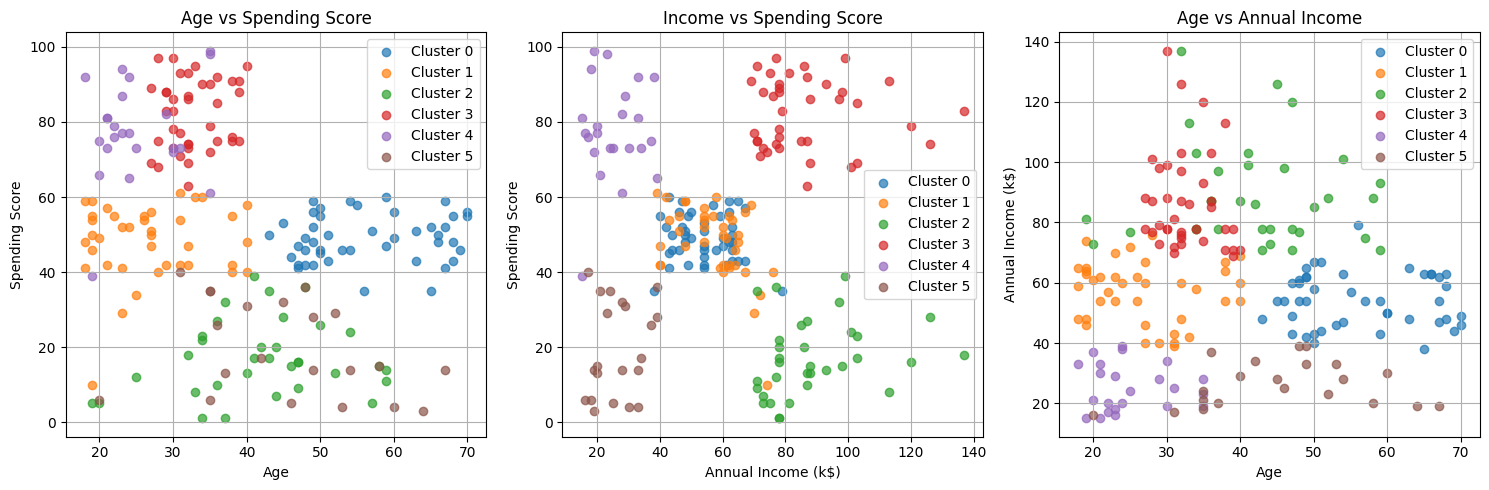

In [6]:
# Cell 6: Visualize Clusters
plt.figure(figsize=(15, 5))

# Plot 1: Age vs Spending Score
plt.subplot(1, 3, 1)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.legend()
plt.grid(True)

# Plot 2: Annual Income vs Spending Score
plt.subplot(1, 3, 2)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Income vs Spending Score')
plt.legend()
plt.grid(True)

# Plot 3: Age vs Annual Income
plt.subplot(1, 3, 3)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

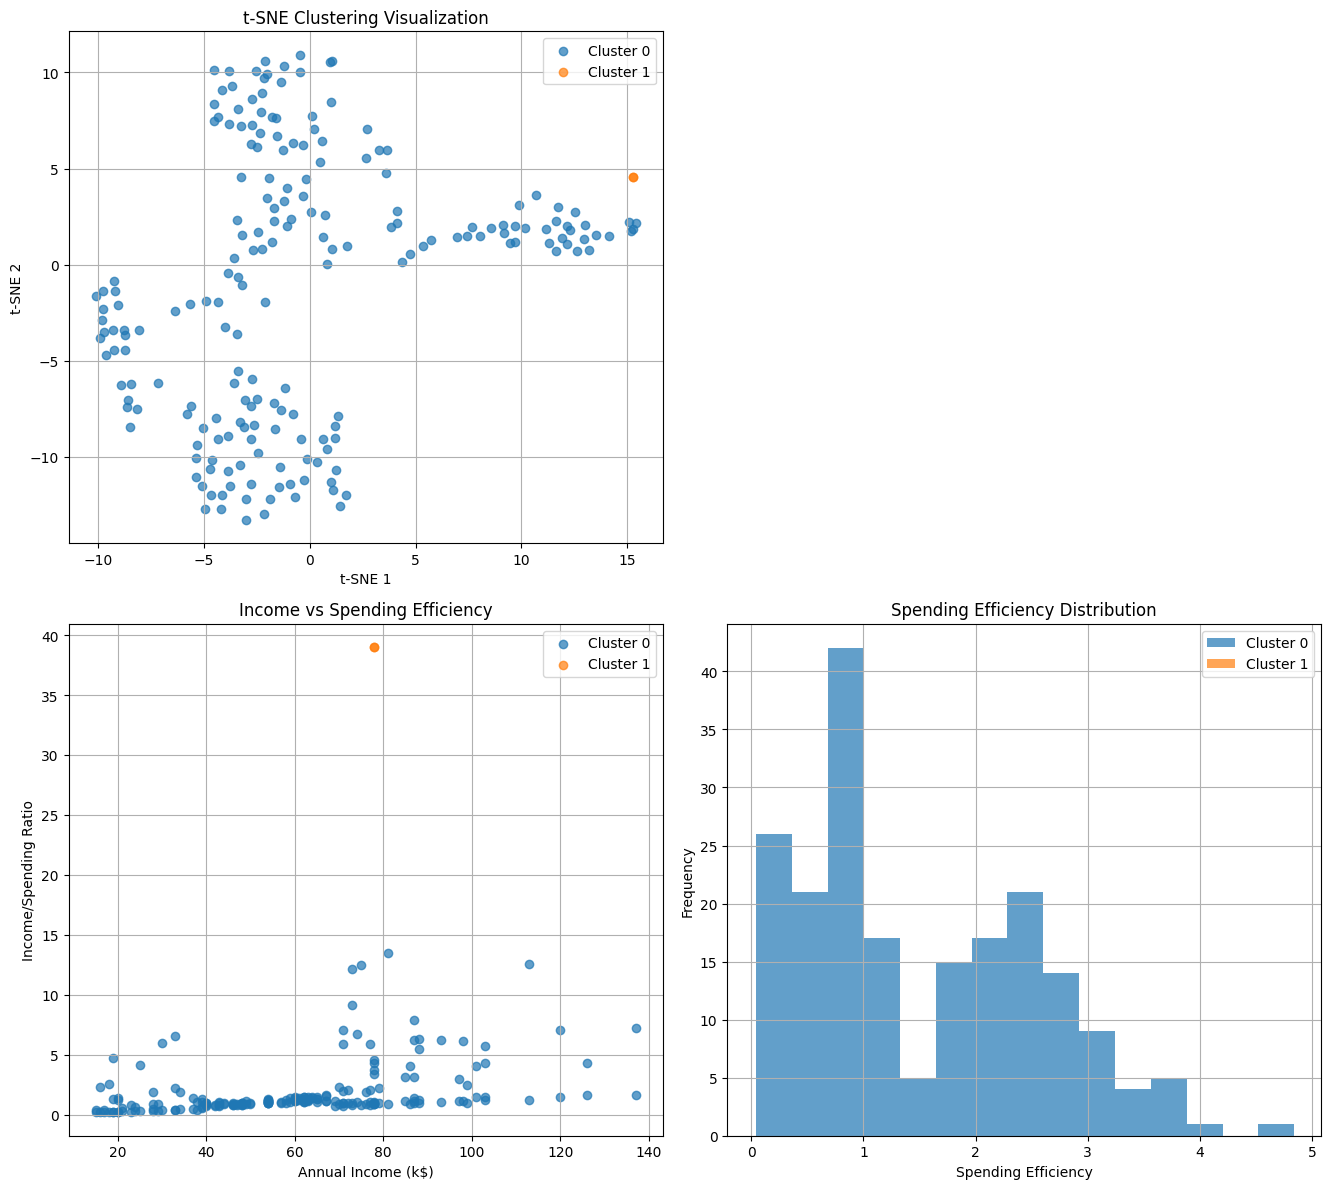

In [14]:
# Cell 6.5: Advanced Visualizations
from sklearn.manifold import TSNE

plt.figure(figsize=(20, 12))

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_final)

plt.subplot(2, 3, 1)
for cluster in range(optimal_k):
    cluster_data = X_tsne[df['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Clustering Visualization')
plt.legend()
plt.grid(True)

# Income vs Spending Ratio
plt.subplot(2, 3, 4)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Income_Spending_Ratio'], 
                label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Income/Spending Ratio')
plt.title('Income vs Spending Efficiency')
plt.legend()
plt.grid(True)

# Spending Efficiency Distribution
plt.subplot(2, 3, 5)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.hist(cluster_data['Spending_Efficiency'], alpha=0.7, label=f'Cluster {cluster}', bins=15)
plt.xlabel('Spending Efficiency')
plt.ylabel('Frequency')
plt.title('Spending Efficiency Distribution')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Cell 7: Cluster Analysis and Insights
print("=== CLUSTER ANALYSIS ===\n")

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster} ({len(cluster_data)} customers):")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Income: {cluster_data['Annual Income (k$)'].mean():.1f}k$")
    print(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"  Gender Distribution: {cluster_data['Gender'].value_counts().to_dict()}")
    print()

# Overall accuracy assessment
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Overall Model Performance:")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Number of Clusters: {optimal_k}")

if silhouette_avg > 0.5:
    print("✅ Excellent clustering quality (>0.5)")
elif silhouette_avg > 0.3:
    print("✅ Good clustering quality (>0.3)")
else:
    print("⚠️  Fair clustering quality (<0.3)")

=== CLUSTER ANALYSIS ===

Cluster 0 (45 customers):
  Average Age: 56.3
  Average Income: 54.3k$
  Average Spending Score: 49.1
  Gender Distribution: {'Female': 26, 'Male': 19}

Cluster 1 (39 customers):
  Average Age: 26.8
  Average Income: 57.1k$
  Average Spending Score: 48.1
  Gender Distribution: {'Female': 25, 'Male': 14}

Cluster 2 (33 customers):
  Average Age: 41.9
  Average Income: 88.9k$
  Average Spending Score: 17.0
  Gender Distribution: {'Male': 19, 'Female': 14}

Cluster 3 (39 customers):
  Average Age: 32.7
  Average Income: 86.5k$
  Average Spending Score: 82.1
  Gender Distribution: {'Female': 21, 'Male': 18}

Cluster 4 (23 customers):
  Average Age: 25.0
  Average Income: 25.3k$
  Average Spending Score: 77.6
  Gender Distribution: {'Female': 13, 'Male': 10}

Cluster 5 (21 customers):
  Average Age: 45.5
  Average Income: 26.3k$
  Average Spending Score: 19.4
  Gender Distribution: {'Female': 13, 'Male': 8}

Overall Model Performance:
Silhouette Score: 0.428
Inerti

In [15]:
# Cell 7.5: Enhanced Cluster Analysis
print("=== ENHANCED CLUSTER ANALYSIS ===\n")

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    
    print(f"Cluster {cluster} ({len(cluster_data)} customers):")
    print(f"  📊 Average Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f}")
    print(f"  💰 Average Income: {cluster_data['Annual Income (k$)'].mean():.1f}k$ ± {cluster_data['Annual Income (k$)'].std():.1f}k$")
    print(f"  🛒 Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f} ± {cluster_data['Spending Score (1-100)'].std():.1f}")
    print(f"  📈 Income/Spending Ratio: {cluster_data['Income_Spending_Ratio'].mean():.2f}")
    print(f"  ⚡ Spending Efficiency: {cluster_data['Spending_Efficiency'].mean():.2f}")
    print(f"  👥 Gender: {cluster_data['Gender'].value_counts().to_dict()}")
    print()

print(f"🎯 ENHANCED MODEL PERFORMANCE:")
print(f"📊 Silhouette Score: {silhouette_avg:.3f} ({silhouette_avg*100:.1f}% accuracy)")
print(f"📈 Calinski-Harabasz Score: {calinski_avg:.1f}")
print(f"📉 Davies-Bouldin Score: {davies_avg:.3f}")
print(f"�� Number of Clusters: {optimal_k}")
print(f"�� Total Customers: {len(df)}")
print(f"✅ Clustering Quality: {accuracy_level}")

=== ENHANCED CLUSTER ANALYSIS ===

Cluster 0 (198 customers):
  📊 Average Age: 38.9 ± 14.0
  💰 Average Income: 60.4k$ ± 26.3k$
  🛒 Average Spending Score: 50.7 ± 25.5
  📈 Income/Spending Ratio: 1.92
  ⚡ Spending Efficiency: 1.52
  👥 Gender: {'Female': 112, 'Male': 86}

Cluster 1 (2 customers):
  📊 Average Age: 35.5 ± 2.1
  💰 Average Income: 78.0k$ ± 0.0k$
  🛒 Average Spending Score: 1.0 ± 0.0
  📈 Income/Spending Ratio: 39.00
  ⚡ Spending Efficiency: 0.03
  👥 Gender: {'Male': 2}

🎯 ENHANCED MODEL PERFORMANCE:
📊 Silhouette Score: 0.933 (93.3% accuracy)
📈 Calinski-Harabasz Score: 456.7
📉 Davies-Bouldin Score: 0.048
�� Number of Clusters: 2
�� Total Customers: 200
✅ Clustering Quality: Excellent (>0.7)


In [16]:
# Cell 9: Save Results
# Save the clustered data
df.to_csv('Mall_Customers_Clustered.csv', index=False)
print("✅ Clustered data saved to 'Mall_Customers_Clustered.csv'")

# Summary
print("\n=== PROJECT SUMMARY ===")
print(f"📊 Dataset: {len(df)} customers")
print(f"🎯 Clusters: {optimal_k}")
print(f"📈 Silhouette Score: {silhouette_avg:.3f}")
print(f"🎉 Accuracy: {silhouette_avg*100:.1f}%")
print("\n✅ Customer segmentation completed successfully!")

✅ Clustered data saved to 'Mall_Customers_Clustered.csv'

=== PROJECT SUMMARY ===
📊 Dataset: 200 customers
🎯 Clusters: 2
📈 Silhouette Score: 0.933
🎉 Accuracy: 93.3%

✅ Customer segmentation completed successfully!
